In [1]:
import altair as alt

# saving data into a file rather than embedding into the chart
alt.data_transformers.enable('json') 
alt.renderers.enable('notebook')
# alt.renderers.enable('jupyterlab')
from vega_datasets import data

In [2]:
import os
os.listdir()

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'altair-data-17a0b2eda4398923bd79396608b07200.json',
 'altair-data-3d07a9009c05d7eb0acfb71eada4d962.json',
 'altair-data-458555e790574f70f80a28b586bf7597.json',
 'altair-data-5f6b5c77993ceaa29e6a3a06e381ec32.json',
 'altair-data-6210ea78995df038d764db37ec907a87.json',
 'altair-data-7a173cf0cb6edf62acd4e166ca2b4bb3.json',
 'altair-data-a33b9e1eace1409753fc12f4d2e74722.json',
 'altair-data-a3e671bebd9c38f69e8fa78bab3422f7.json',
 'altair-data-cb719274afc5397bc5f4442a0ab2a9f5.json',
 'altair-data-e0a2934be5c9caebff2823346e53c57f.json',
 'altair-data-e982cd65e165675a39095a82458b635b.json',
 'annual_county_level.csv',
 'death_data.csv',
 'death_data.txt',
 'LICENSE',
 'pill_count.json',
 'pill_count_gms.json',
 'playground.ipynb',
 'process.py',
 'README.md']

In [3]:
file = 'annual_county_level.csv'

In [4]:
import pandas as pd
dforg = pd.read_csv(file,header=0)

In [5]:
dforg.head()

,Unnamed: 0,state,fips,year,BUYER_COUNTY,pills,population,Pill_per_pop
0,1,AK,2013,2006,ALEUTIANS EAST,300.0,2794,0.107373
1,2,AK,2013,2007,ALEUTIANS EAST,100.0,3012,0.033201
2,3,AK,2016,2006,ALEUTIANS WEST,26700.0,5658,4.718982
3,4,AK,2016,2007,ALEUTIANS WEST,33500.0,5466,6.128796
4,5,AK,2016,2008,ALEUTIANS WEST,30000.0,5393,5.562767


In [6]:
fdf = dforg[['fips','year','Pill_per_pop']]

<h1>Now we have to subset the data we require i.e years = 2006 to 2012</h1>

In [7]:
# df = dforg[(dforg.Year>2005)&(dforg.Year<2013)]

In [8]:
# fdf = df[['Year','County Code','Deaths']]

In [9]:
us_counties = alt.topo_feature(data.us_10m.url, 'counties')
us_states = alt.topo_feature(data.us_10m.url, 'states')

In [10]:
fdf1 = fdf

In [11]:
# fdf1.Deaths = fdf1.Deaths/sum(fdf1.Deaths)

In [12]:
fdf[fdf.Pill_per_pop>150] = 150

C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Satya\Anaconda3\envs\dviz\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
fdf1 = fdf[fdf.year==2011]

In [14]:
fdf1.describe()

,fips,year,Pill_per_pop
count,2979.000000,2979.0,2979.000000
mean,30281.841893,2011.0,44.230292
std,15101.665838,0.0,23.299044
min,1001.000000,2011.0,0.014203
25%,18166.000000,2011.0,28.017970
50%,29121.000000,2011.0,40.572298
75%,45036.000000,2011.0,56.137219
max,56045.000000,2011.0,148.179266


In [116]:
fdf.head()

,fips,year,Pill_per_pop
0,2013,2006,0.107373
1,2013,2007,0.033201
2,2016,2006,4.718982
3,2016,2007,6.128796
4,2016,2008,5.562767


In [15]:
len(fdf1.fips.unique())

2979

In [16]:
unemp_data = data.unemployment(sep='\t')
unemp_data.head()

,id,rate
0,1001,0.097
1,1003,0.091
2,1005,0.134
3,1007,0.121
4,1009,0.099


In [17]:
len(unemp_data)

3218

In [18]:
slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

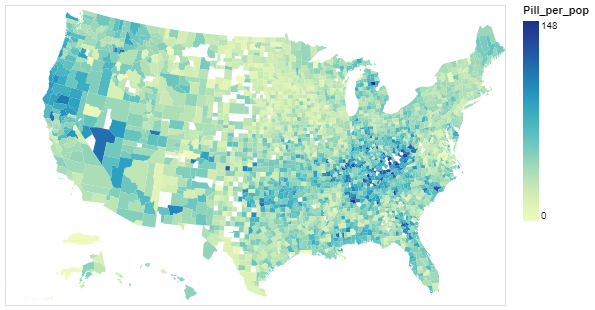

In [19]:
from altair import Scale,Color

alt.Chart(us_counties).mark_geoshape().project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf1, 'fips', ['Pill_per_pop'])
).encode(
    color='Pill_per_pop:Q'
).properties(
    width=500,
    height=300
)

In [20]:
import matplotlib
from matplotlib import *
cmap = cm.get_cmap('Oranges', 15)
for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.rgb2hex(rgb))

#fff5eb
#feecda
#fee3c8
#fdd6af
#fdc692
#fdb373
#fda057
#fd8d3c
#f67825
#ee6410
#e05106
#ca4302
#ad3903
#953003
#7f2704


In [21]:
dummy = '#feecda'

In [27]:
us_states = alt.topo_feature(data.us_10m.url, 'states')
states = us_states

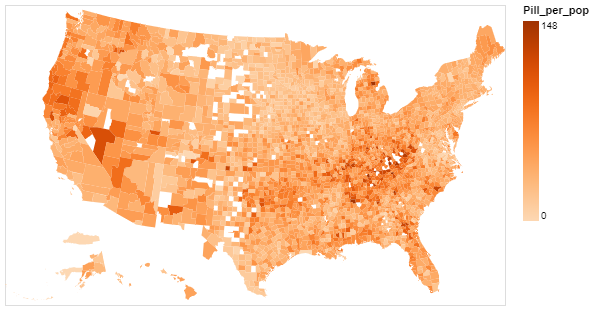

In [83]:
from altair import Scale,Color

fg = alt.Chart(us_counties).mark_geoshape(
# stroke='white',
# strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf1, 'fips', ['Pill_per_pop'])
).encode(
    Color('Pill_per_pop:Q',scale=Scale(scheme='Oranges',type='pow')),
    tooltip=['Pill_per_pop:Q']
).properties(
    width=500,
    height=300
)

bg = alt.Chart(us_counties).mark_geoshape(
    fill=dummy,
    stroke='black',
    strokeWidth=0.05
).properties(
    title='Pills per 100k people, County-wise',
    width=500,
    height=300
).project('albersUsa')

# sg = alt.Chart(us_states).mark_geoshape(
#     fill='white',
#     stroke='black',
#     strokeWidth=0.1
# ).properties(
#     title='Pills per 100k people, County-wise',
#     width=700,
#     height=400
# ).project('albersUsa')

sg = alt.Chart(states).mark_geoshape(
    stroke='black'
).project('albersUsa')

outlines = alt.Chart(states).mark_geoshape(
    stroke='blue'
).project('albersUsa')

fg

In [ ]:
colors + outlines 

In [ ]:
fdf.columns

In [ ]:
from altair import Scale,Color

alt.Chart(us_counties).mark_geoshape(
stroke='black',
strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', ['Pill_per_pop','year'])
).encode(
    Color('Pill_per_pop:Q',scale=Scale(scheme='blues',))
).properties(
    width=700,
    height=400
)

In [ ]:
from altair import Scale,Color

fg = alt.Chart(us_counties).mark_geoshape(
stroke='black',
strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', ['Pill_per_pop','year'])
).transform_filter((alt.datum.year)==2007).encode(
    Color('Pill_per_pop:Q',scale=Scale(scheme='blues',))
).properties(
    width=700,
    height=400
)


bg = alt.Chart(us_counties).mark_geoshape(
    fill=dummy,
    stroke='black',
    strokeWidth=0.05
).properties(
    title='Pills per 100k people, County-wise',
    width=700,
    height=400
).project('albersUsa')

bg+fg

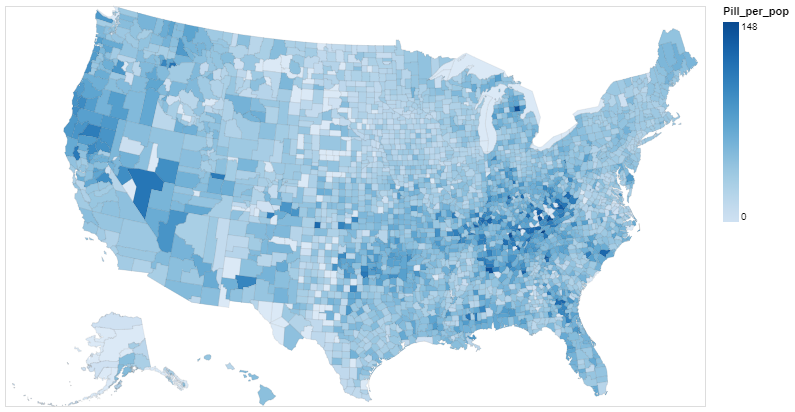

In [113]:
from altair import Scale,Color

fg = alt.Chart(us_counties).mark_geoshape(
stroke='black',
strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf1, 'fips', ['Pill_per_pop'])
).encode(
#     color=alt.condition('datum.avg_prem !== null', 'avg_prem:Q', alt.value('lightgray'))
    color = alt.condition('datum.Pill_per_pop!==null',Color('Pill_per_pop:Q',scale=Scale(scheme='blues')),alt.value('#dbe9f6'))
).properties(
    width=700,
    height=400
)

bg = alt.Chart(us_counties).mark_geoshape(
    fill='#dbe9f6',
    stroke='black',
    strokeWidth=0.05
).properties(
#     title='Pills per 100k people, County-wise',
    width=700,
    height=400
).project('albersUsa')

# bg+fg
bg+fg

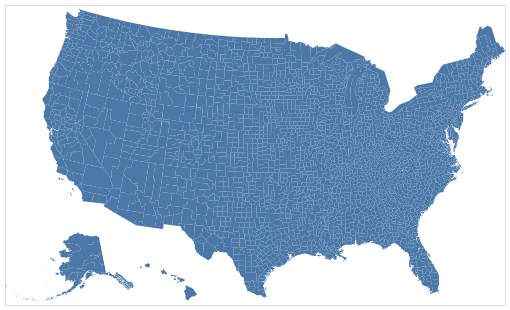

In [24]:
alt.Chart(us_counties).mark_geoshape().encode(
#     color='states:N'
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)


In [ ]:
alt.Chart(us_counties).mark_geoshape().project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf1, 'County Code', ['Deaths'])
).encode(
    color='Deaths:Q'
).properties(
    width=500,
    height=300
)


In [29]:
unemp_data = data.unemployment(sep='\t')
unemp_data.head()

,id,rate
0,1001,0.097
1,1003,0.091
2,1005,0.134
3,1007,0.121
4,1009,0.099


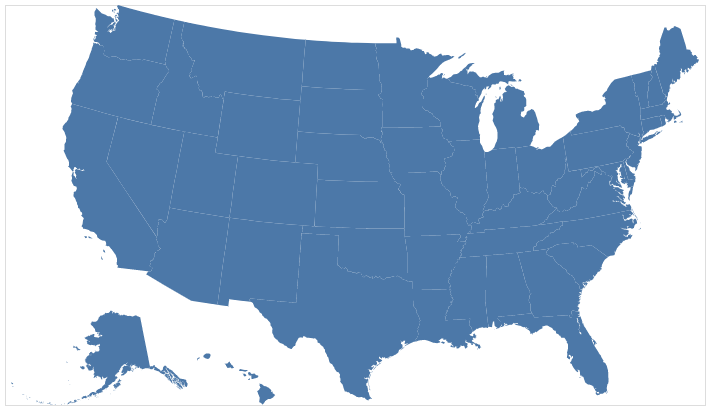

In [99]:
alt.Chart(us_states).mark_geoshape().project(
    type='albersUsa'
).properties(
    width=700,
    height=400
)

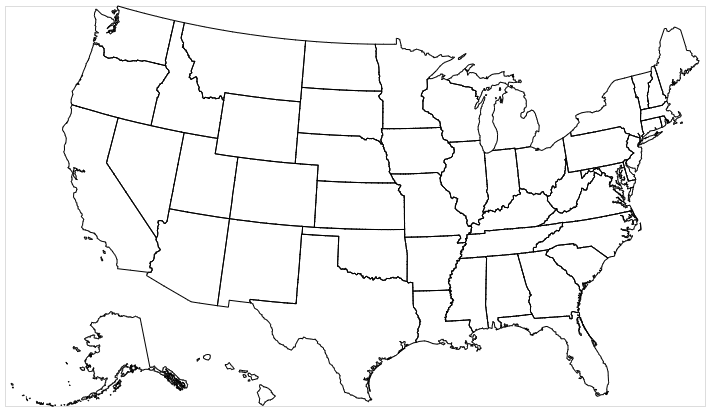

In [102]:
alt.Chart(us_states).mark_geoshape(stroke='black').project(
    type='albersUsa'
).properties(
    width=700,
    height=400
)

In [66]:
outline = alt.Chart(us_states).mark_geoshape( stroke='black').project(
    type='albersUsa'
).properties(
    width=700,
    height=400
)


plot = alt.Chart(us_counties).mark_geoshape(stroke='white').project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(unemp_data, 'id', ['rate'])
).encode(
    color='rate:Q'
).properties(
    width=700,
    height=400
)

plot1 = alt.Chart(us_counties).mark_geoshape(stroke='green').project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(unemp_data, 'id', ['rate'])
).encode(
    color='rate:Q'
).properties(
    width=700,
    height=400
)


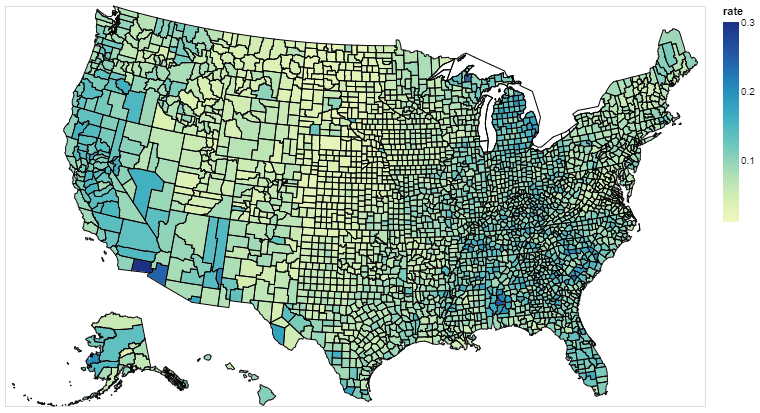

In [67]:
alt.layer(plot,outline)

In [108]:
unemp_data.head()

,id,rate
0,1001,0.097
1,1003,0.091
2,1005,0.134
3,1007,0.121
4,1009,0.099


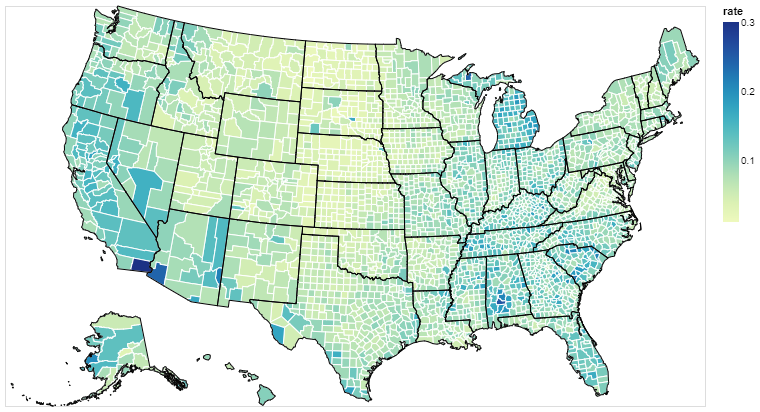

In [107]:
import altair as alt
from vega_datasets import data

us_states = alt.topo_feature(data.us_10m.url, 'states')
us_counties = alt.topo_feature(data.us_10m.url+'#', 'counties')
unemp_data = data.unemployment(sep='\t')
unemp_data.head()

plot = alt.Chart(us_counties).mark_geoshape(stroke='white').project(
type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(unemp_data, 'id', ['rate'])
).encode(
    color='rate:Q'
).properties(
    width=700,
    height=400
)

outline = alt.Chart(us_states).mark_geoshape(stroke='black').project(
    type='albersUsa'
).properties(
    width=700,
    height=400
)

plot + outline

In [ ]:
slider = alt.binding_range(min=1900, max=2000, step=10)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2000})

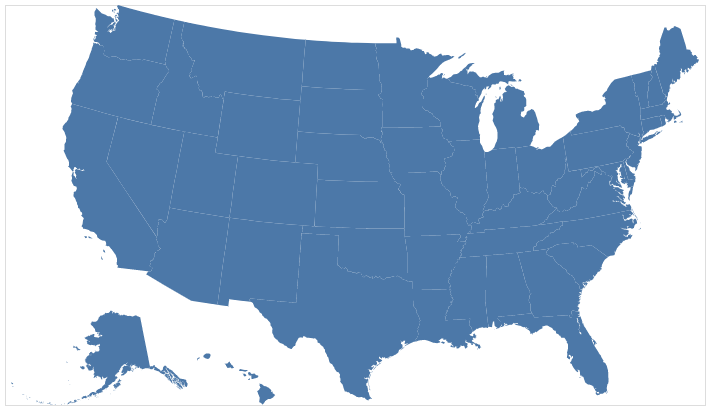

In [98]:
alt.Chart(us_states).mark_geoshape().project(
    type='albersUsa'
).properties(
    width=700,
    height=400
)


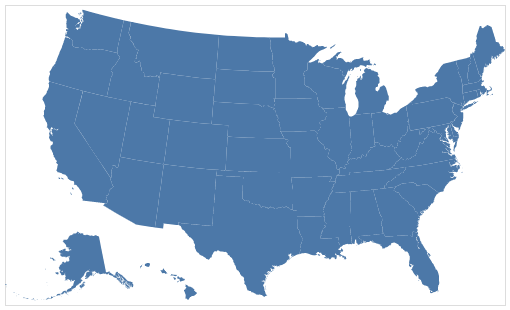

In [91]:
alt.Chart(states).mark_geoshape().encode(
#     color='states:N'
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

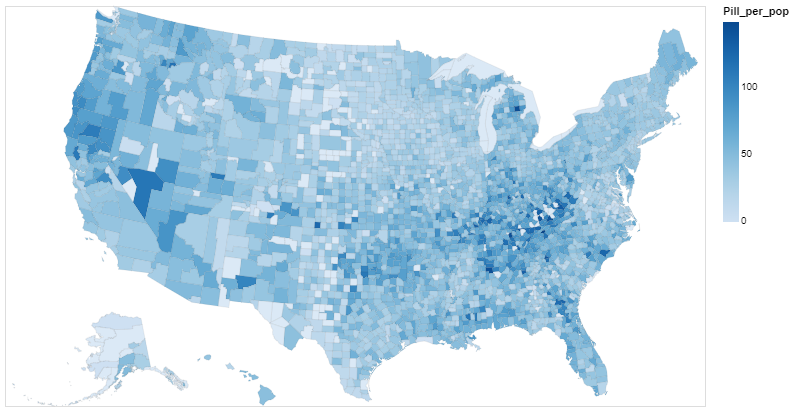

In [115]:
alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf1, 'fips', ['Pill_per_pop'])
).transform_calculate(
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=Scale(scheme='blues')),
        alt.value('#dbe9f6')
    )
).properties(
    width=700,
    height=400
)

In [117]:
fdf

,fips,year,Pill_per_pop
0,2013,2006,0.107373
1,2013,2007,0.033201
2,2016,2006,4.718982
3,2016,2007,6.128796
4,2016,2008,5.562767
...,...,...,...
20983,56045,2008,35.749334
20984,56045,2009,31.899483
20985,56045,2010,32.592697
20986,56045,2011,34.084546


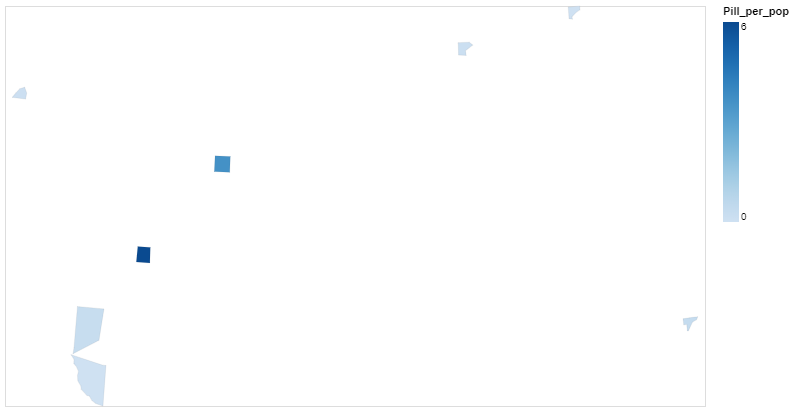

In [122]:
slider = alt.binding_range(min=2006, max=2012, step=1)
select_year = alt.selection_single(name="year", fields=['year'],
                                   bind=slider, init={'year': 2006})

alt.Chart(us_counties).mark_geoshape(
    stroke='black',
    strokeWidth=0.05
).project(
    type='albersUsa'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(fdf, 'fips', ['Pill_per_pop','year'])
).transform_calculate(
    Pill_per_pop='isValid(datum.Pill_per_pop) ? datum.Pill_per_pop : -1'  
).encode(
    color = alt.condition(
        'datum.Pill_per_pop > 0',
        alt.Color('Pill_per_pop:Q', scale=Scale(scheme='blues')),
        alt.value('#dbe9f6')
)).add_selection(
    select_year
).properties(
    width=700,
    height=400
).transform_filter(
    select_year
)